In [ ]:
# Tanawat Panitpongsri UID 706306642

In [ ]:
# Homework 8 - ECON425T - Winter 2024

## Import and Clean data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#drive.mount('/content/gdrive/', force_remount = True)

In [4]:
df = pd.read_csv("marketing_campaign.csv", sep = ";")

In [5]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [6]:
df = df.drop(["contact", "day",	"month",	"pdays"], axis = 1)
df = pd.get_dummies(df, columns = ["job", "marital","education","default","housing","loan", "poutcome"], drop_first = True)


In [7]:
df.head()

,age,balance,duration,campaign,previous,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,261,1,0,no,False,False,False,True,...,False,False,True,False,False,True,False,False,False,True
1,44,29,151,1,0,no,False,False,False,False,...,True,True,False,False,False,True,False,False,False,True
2,33,2,76,1,0,no,False,True,False,False,...,False,True,False,False,False,True,True,False,False,True
3,47,1506,92,1,0,no,True,False,False,False,...,False,False,False,True,False,True,False,False,False,True
4,33,1,198,1,0,no,False,False,False,False,...,True,False,False,True,False,False,False,False,False,True


In [8]:
y = pd.get_dummies(df["y"], drop_first = True)
X = df.drop(["y"], axis = 1)

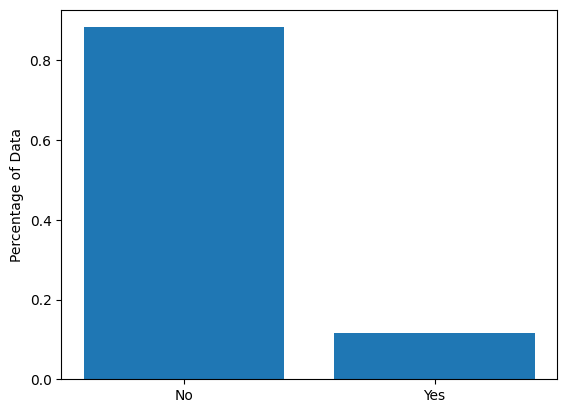

In [9]:
obs = len(y)
plt.bar(["No","Yes"],[len(y[y.yes==0])/obs,len(y[y.yes==1])/obs])
plt.ylabel("Percentage of Data")
plt.show()

# Problem 1
### (i) First, suppose each tree in a random forest picks a random subset of 𝑚 = √𝑝 features at each split, where 𝑝 is the number of features in the data. On the training sample, fit the random forest to predict subscription to a term deposit. Vary the number of trees in the range {1,2,3,4,5,10,20,50}. Plot accuracy, precision, recall, and F1 score on the testing sample against the number of trees.

In [14]:
# Split the data into training and test sets (a third of the data to the testing sample)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

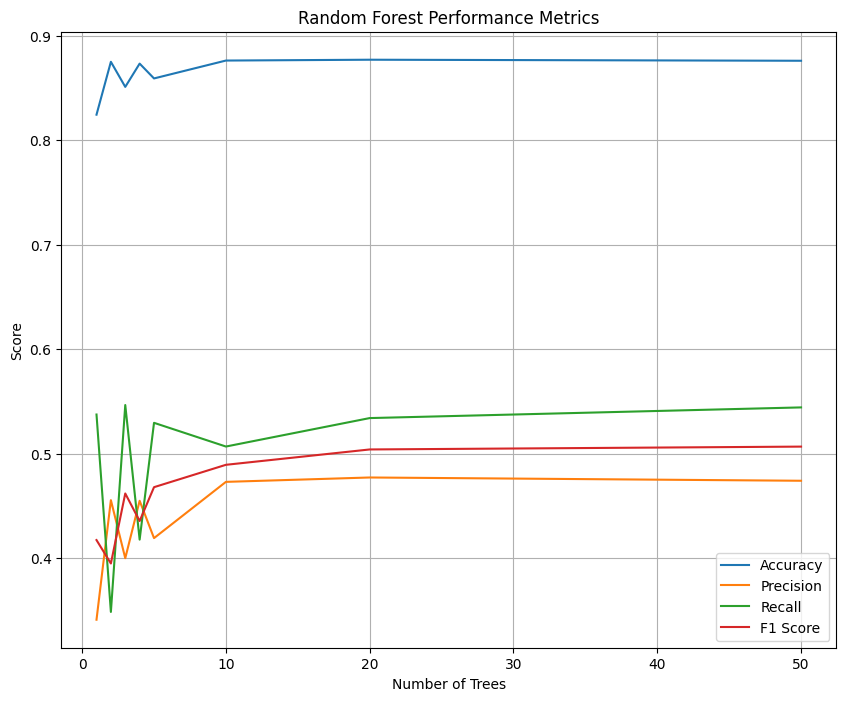

In [21]:
# List to store the number of trees
n_trees = [1, 2, 3, 4, 5, 10, 20, 50]

# Lists to store the metrics
rf_accuracies = []
rf_precisions = []
rf_recalls = []
rf_f1_scores = []

# Iterate over the specified number of trees
for n in n_trees:
    # Initialize the Random Forest classifier with the current number of trees
    # m is set to the square root of p (number of features) automatically in RandomForestClassifier
    rf = RandomForestClassifier(n_estimators=n, max_features='sqrt', random_state=42)
    
    # Train the model
    rf.fit(X_train_smote, y_train_smote.values.ravel())
    
    # Make predictions on the test set
    predictions = rf.predict(X_test_scaled)
    
    # Calculate and store each metric
    rf_accuracies.append(accuracy_score(y_test, predictions))
    rf_precisions.append(precision_score(y_test, predictions))
    rf_recalls.append(recall_score(y_test, predictions))
    rf_f1_scores.append(f1_score(y_test, predictions))

# Plotting the metrics
plt.figure(figsize=(10, 8))
plt.plot(n_trees, rf_accuracies, label='Accuracy')
plt.plot(n_trees, rf_precisions, label='Precision')
plt.plot(n_trees, rf_recalls, label='Recall')
plt.plot(n_trees, rf_f1_scores, label='F1 Score')
plt.xlabel('Number of Trees')
plt.ylabel('Score')
plt.title('Random Forest Performance Metrics')
plt.legend()
plt.grid(True)
plt.show()

### (ii) Repeat (i) with bagging, i.e. 𝑚 = 𝑝.

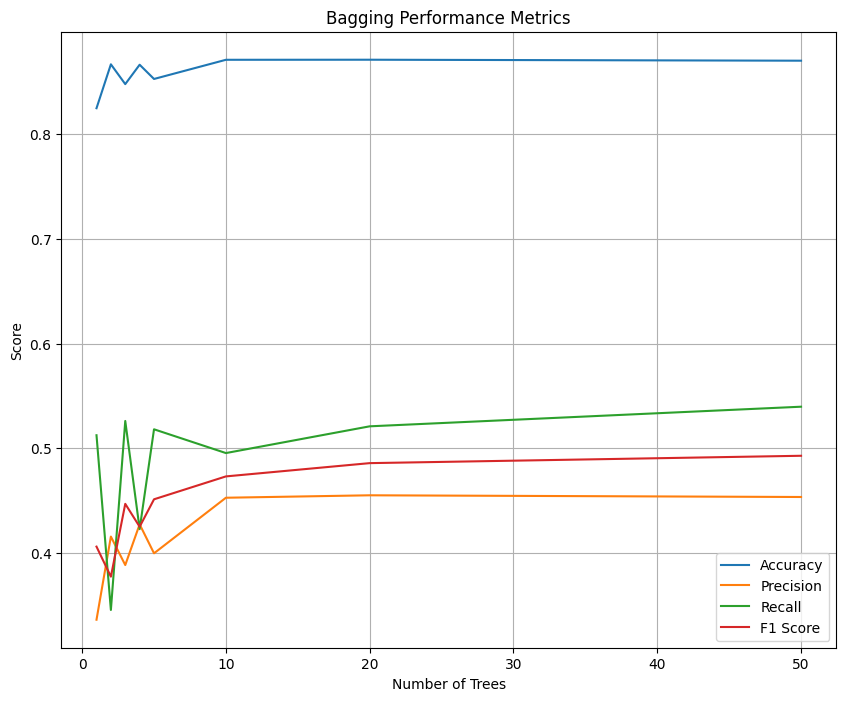

In [22]:
# Lists to store the metrics for bagging
bagging_accuracies = []
bagging_precisions = []
bagging_recalls = []
bagging_f1_scores = []

# Iterate over the specified number of trees for bagging
for n in n_trees:
    # Initialize the BaggingClassifier with the current number of trees
    bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=n, random_state=42)
    
    # Train the model
    bagging.fit(X_train_smote, y_train_smote.values.ravel())
    
    # Make predictions on the test set
    predictions = bagging.predict(X_test_scaled)
    
    # Calculate and store each metric
    bagging_accuracies.append(accuracy_score(y_test, predictions))
    bagging_precisions.append(precision_score(y_test, predictions, zero_division=0))
    bagging_recalls.append(recall_score(y_test, predictions))
    bagging_f1_scores.append(f1_score(y_test, predictions))

# Plotting the metrics for bagging
plt.figure(figsize=(10, 8))
plt.plot(n_trees, bagging_accuracies, label='Accuracy')
plt.plot(n_trees, bagging_precisions, label='Precision')
plt.plot(n_trees, bagging_recalls, label='Recall')
plt.plot(n_trees, bagging_f1_scores, label='F1 Score')
plt.xlabel('Number of Trees')
plt.ylabel('Score')
plt.title('Bagging Performance Metrics')
plt.legend()
plt.grid(True)
plt.show()


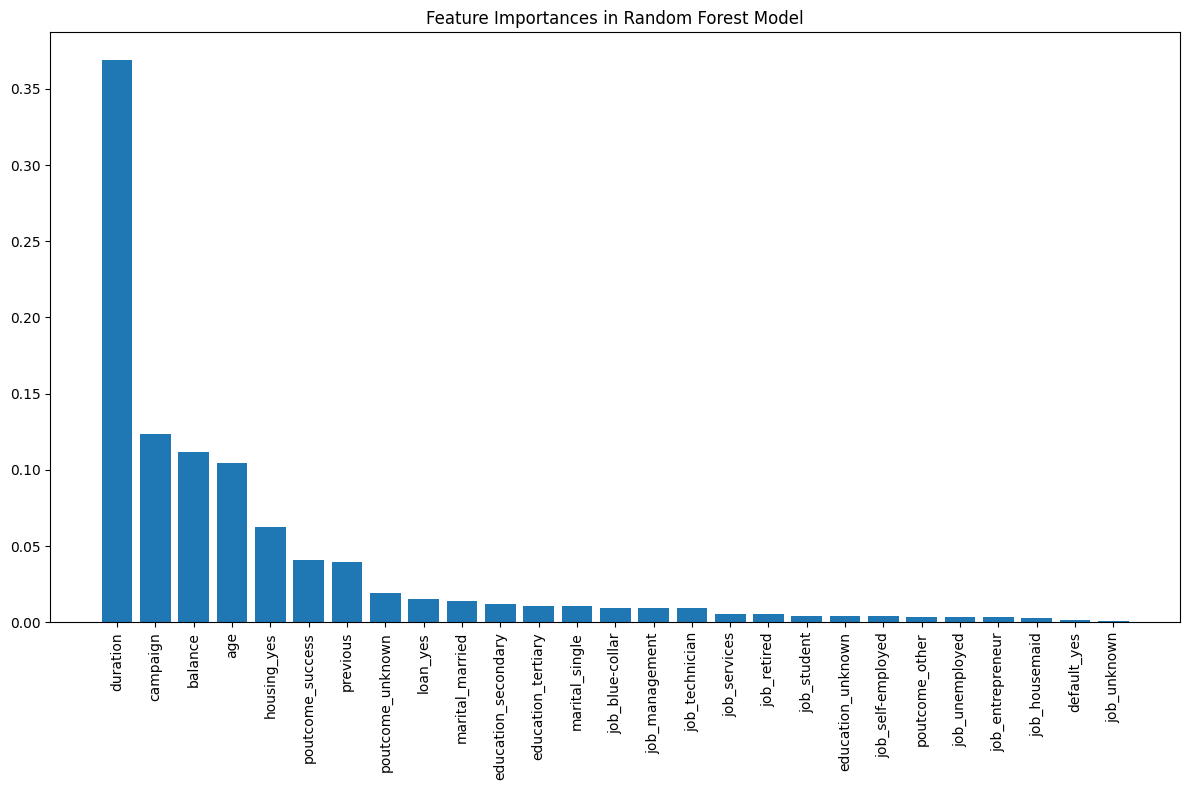

In [24]:
# Extract feature importances
feature_importances = rf.feature_importances_

# Get the indices of the features sorted by importance
sorted_indices = np.argsort(feature_importances)[::-1]

# Plotting
plt.figure(figsize=(12, 8))
plt.title('Feature Importances in Random Forest Model')
plt.bar(range(X.shape[1]), feature_importances[sorted_indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

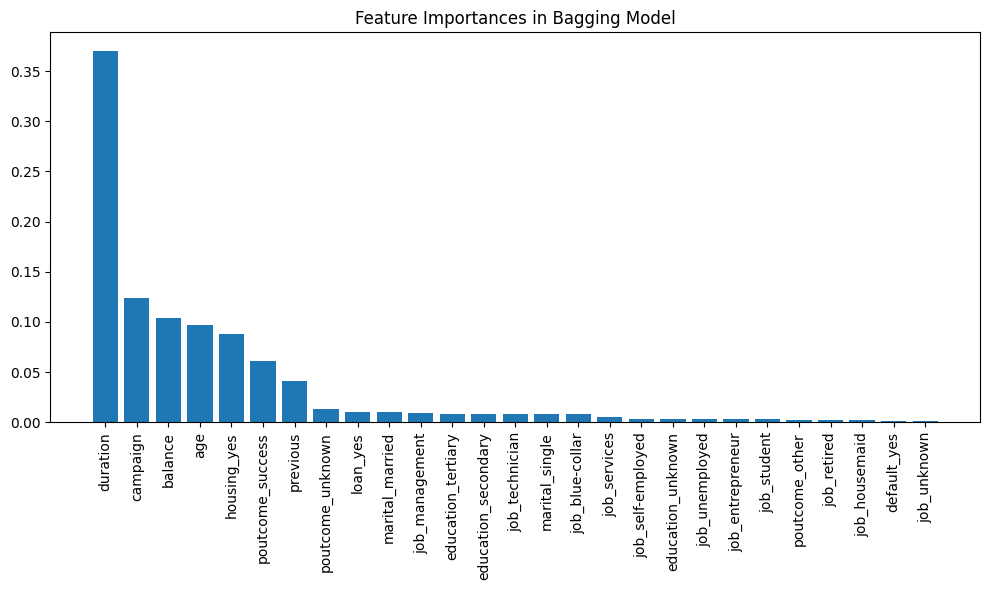

In [25]:
trees = bagging.estimators_

# Initialize an array to accumulate feature importances
feature_importances = np.zeros(X_train.shape[1])

# Aggregate feature importances from all trees in the bagging model
for tree in trees:
    feature_importances += tree.feature_importances_

# Average the feature importances
feature_importances /= len(trees)

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Visualize the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances in Bagging Model")
plt.bar(range(X_train.shape[1]), feature_importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

### (iii) Pick the best-performing model and use the feature_importances_ attribute of RandomForestClassifier to evaluate importance of different features. Is there a clearly dominating feature? Explain.

From my perspective, RandomForest n_trees = 20 is the best model since Recall should be the most important ratio to be considered for this imbalanced data. This is because the bank might need to get the highest number of true positives regardless of false positives. If the bank picks the wrong person to promote the campaign (false positive), the additional cost is very small. However, if the bank focuses on high recall (getting a high number of true positives), they will make money from the successful calls (getting more subscriptions). This RandomForest model gives a higher value of Recall than the Bagging model, and it has a smaller chance of facing an overfitting problem.

From the important features, it is clear from the evidence in RandomForest and Bagging that "duration" is a dominating feature. This is because if the customers spend more time talking with employees, they might have more chance to subscribe to the term deposit.

### (iv) Beyond sampling variation, is there any other explanation for the alternating pattern in some performance metrics arising when the number of trees is very small?
1) When the number of trees is small. changing in number of trees will contribute to a significant improvement of performance metrics. This change might come from a good chance of random process and from the additional trees that  might capture unseen data well.
2) Increasing the number of trees from the current small number of trees might address the underfitting issue and make a big improvement of performance metrics.